In [2]:
import kagglehub
import pandas as pd



path = kagglehub.dataset_download("tawfikelmetwally/wine-dataset")

data_raw = pd.read_csv(path + "/Wine dataset.csv")
data_raw.head()

d:\Repositories\wineClassification\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 4.45k/4.45k [00:00<00:00, 4.90MB/s]

Extracting files...


,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()


data_raw[['Magnesium_norm', 'Proline_norm']] = scaller.fit_transform(data_raw[['Magnesium', 'Proline ']])


data_norm = data_raw.drop(columns=['Magnesium', 'Proline '])
data_norm.head()    

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Magnesium_norm,Proline_norm
0,1,14.23,1.71,2.43,15.6,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1.913905,1.013009
1,1,13.20,1.78,2.14,11.2,2.65,2.76,0.26,1.28,4.38,1.05,3.40,0.018145,0.965242
2,1,13.16,2.36,2.67,18.6,2.80,3.24,0.30,2.81,5.68,1.03,3.17,0.088358,1.395148
3,1,14.37,1.95,2.50,16.8,3.85,3.49,0.24,2.18,7.80,0.86,3.45,0.930918,2.334574
4,1,13.24,2.59,2.87,21.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,1.281985,-0.037874


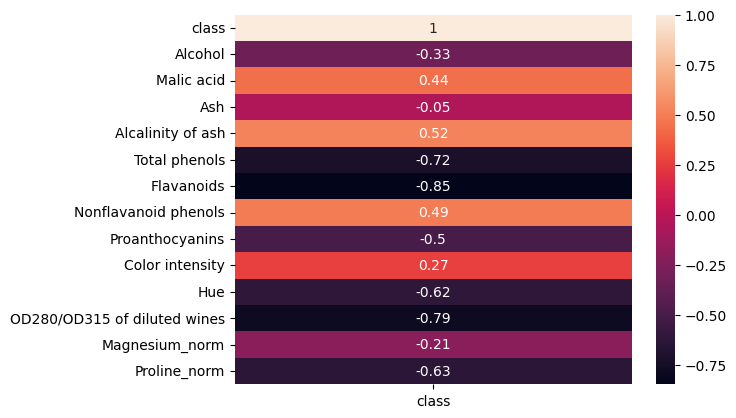

In [5]:
sns.heatmap(data_norm.corr()[['class']], annot=True)
plt.show()

In [6]:
data_ml = data_norm[['Total phenols', 'Flavanoids', 'Hue', 'OD280/OD315 of diluted wines', 'Magnesium_norm', 'Proline_norm', 'class']]

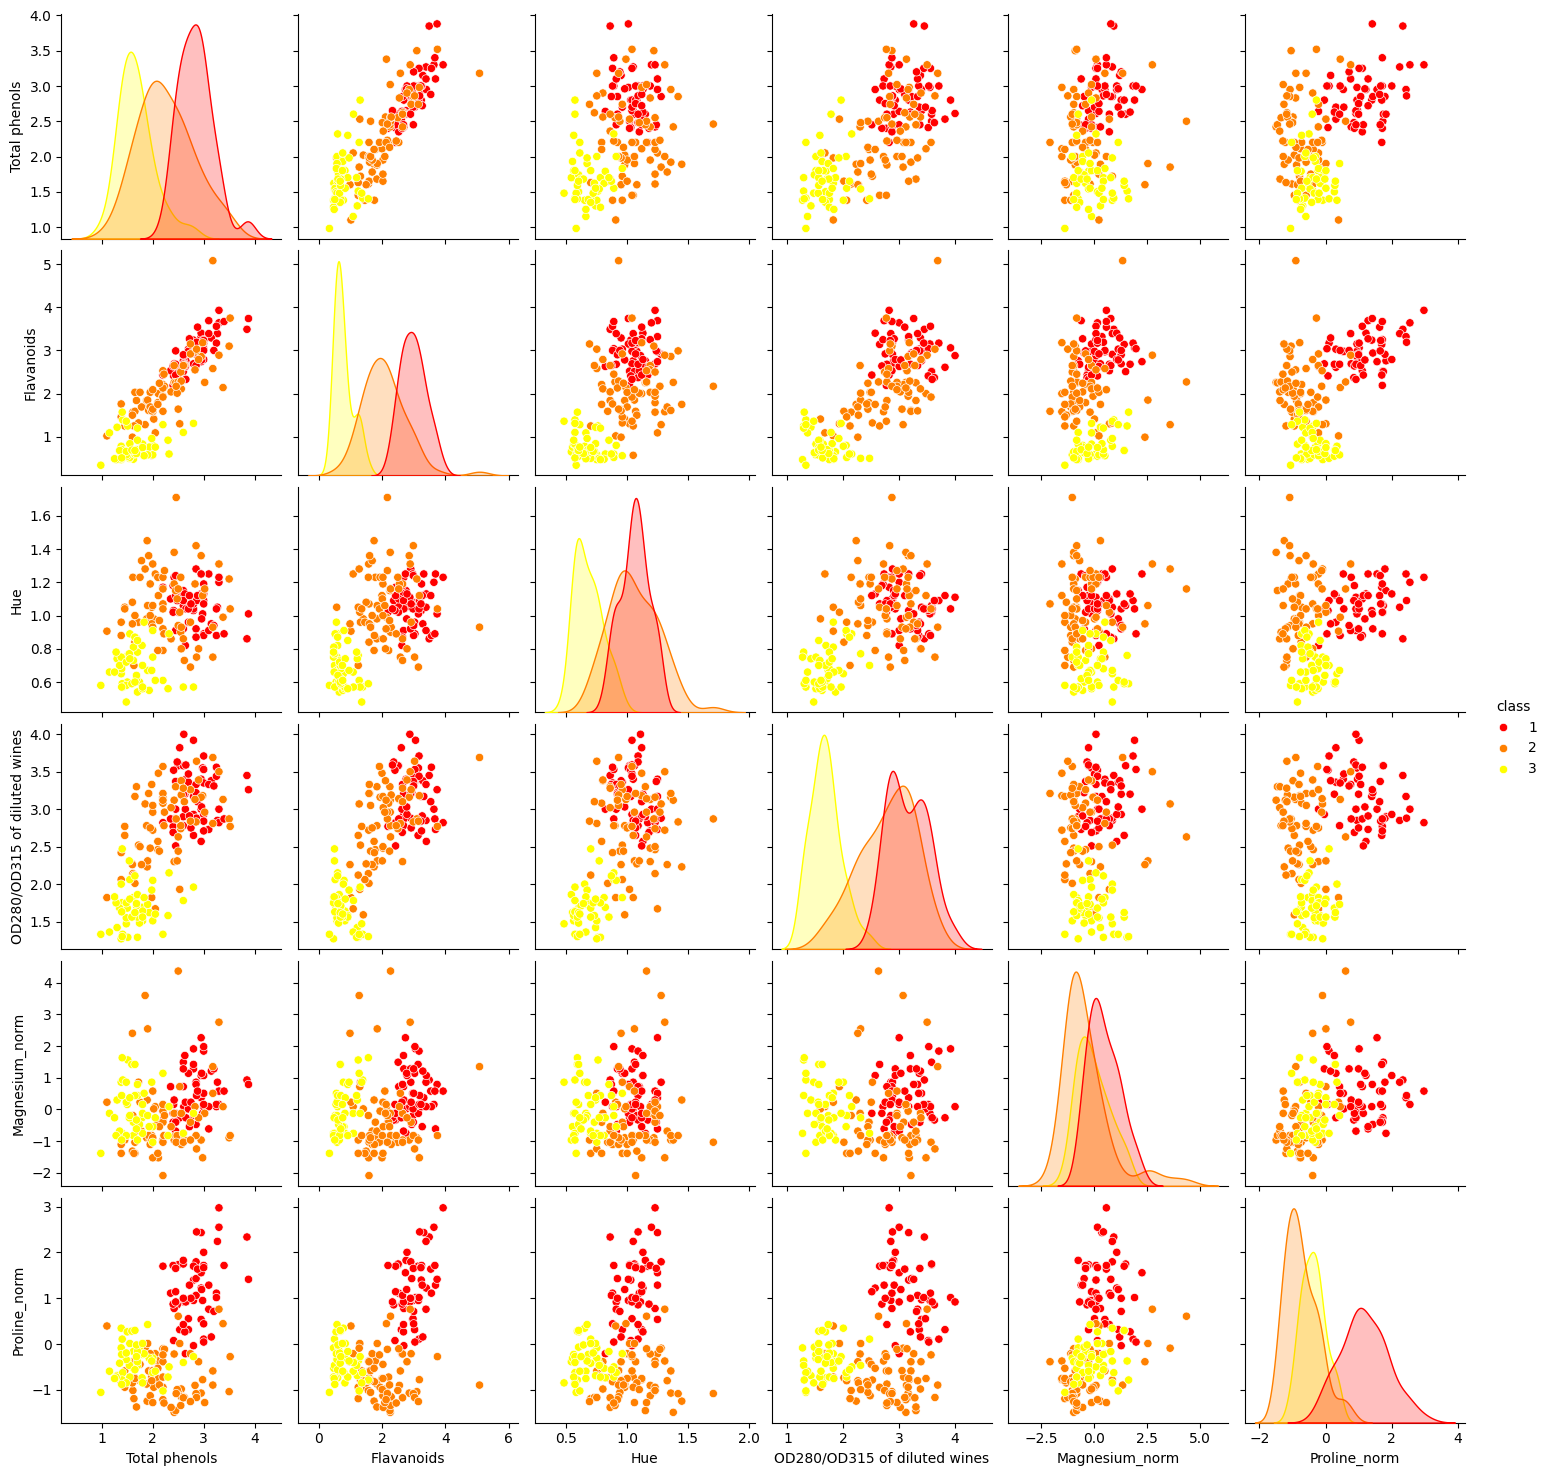

In [7]:
sns.pairplot(data_ml,hue="class", palette="autumn")
plt.show()

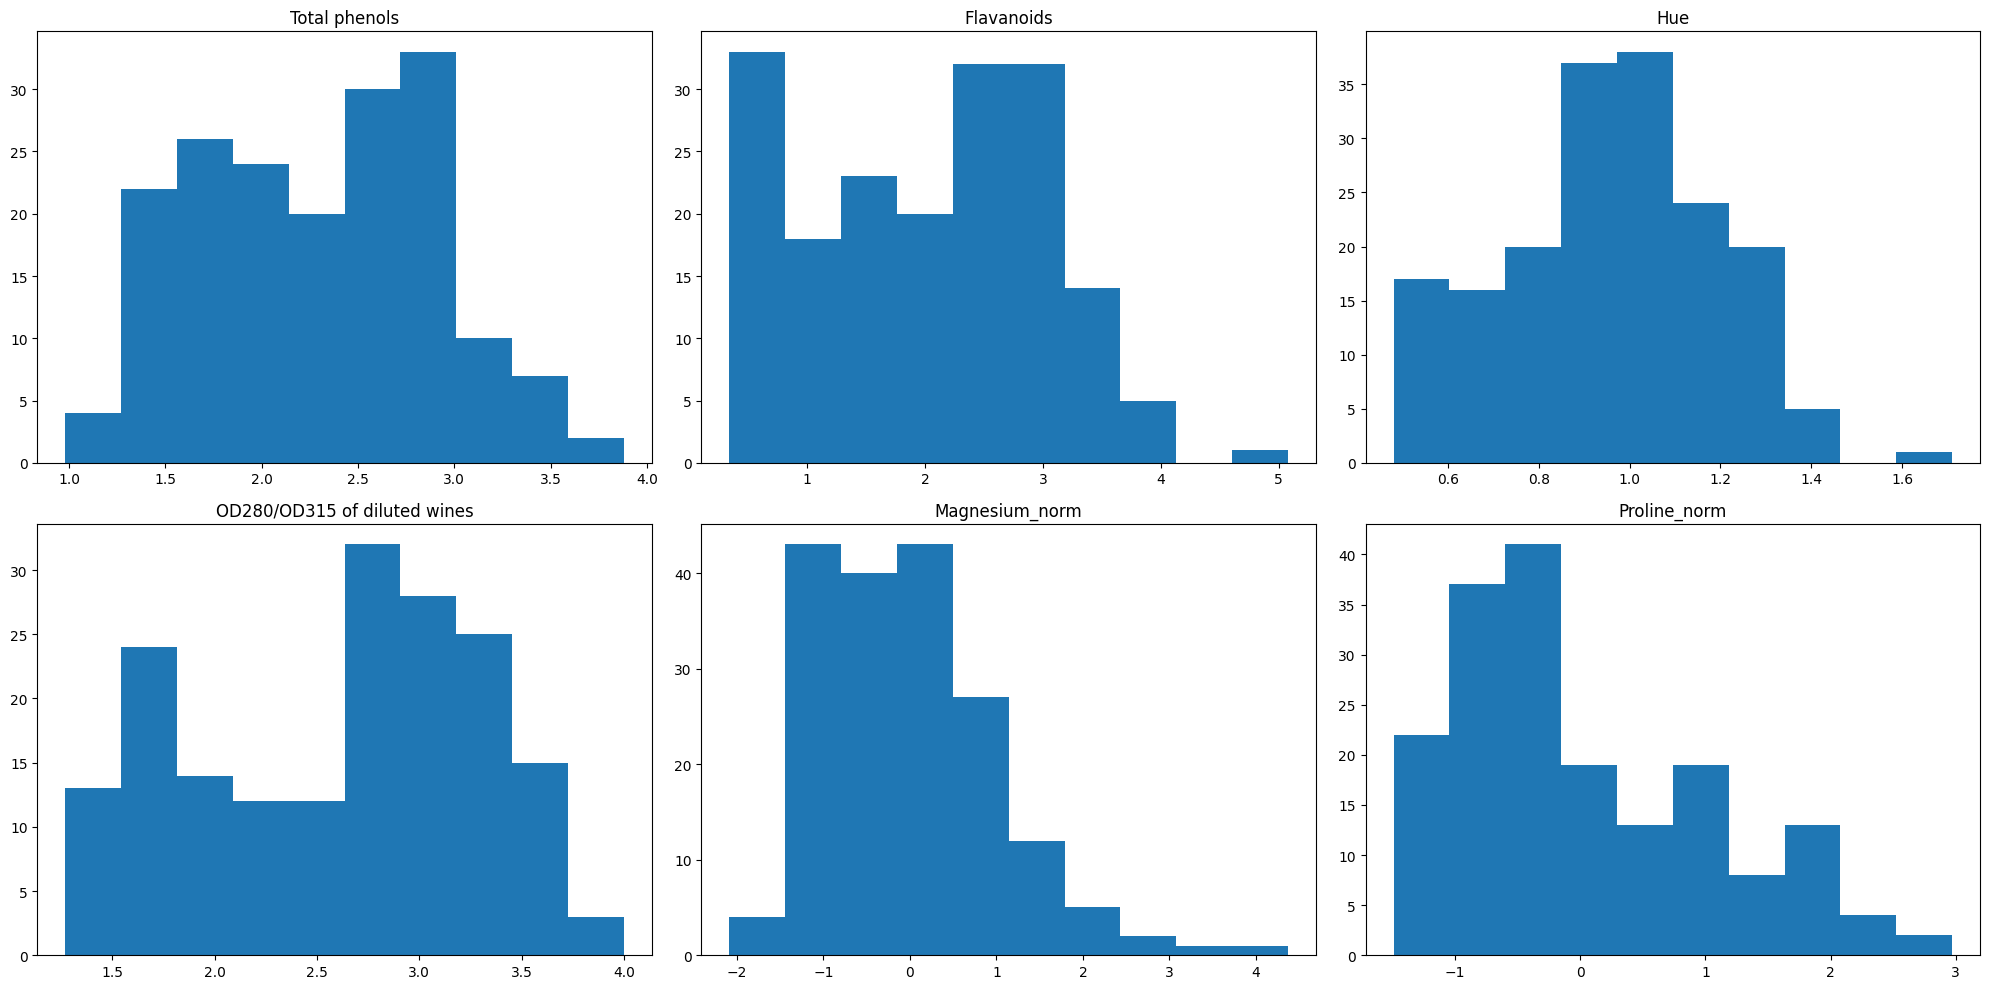

In [41]:
import numpy as np


plot_titles = ['Total phenols', 'Flavanoids', 'Hue', 'OD280/OD315 of diluted wines', 'Magnesium_norm', 'Proline_norm']


fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.flatten()


for i, title in enumerate(plot_titles):
    axs[i].hist(data_ml[title])  
    axs[i].set_title(title)  

plt.tight_layout()
plt.show()

### Modelo

In [42]:
# separar em treino e teste

from sklearn.model_selection import train_test_split

X = data_ml.drop(columns=['class'])
y = data_norm['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

